### Learning Curve in Machine Learning using Python

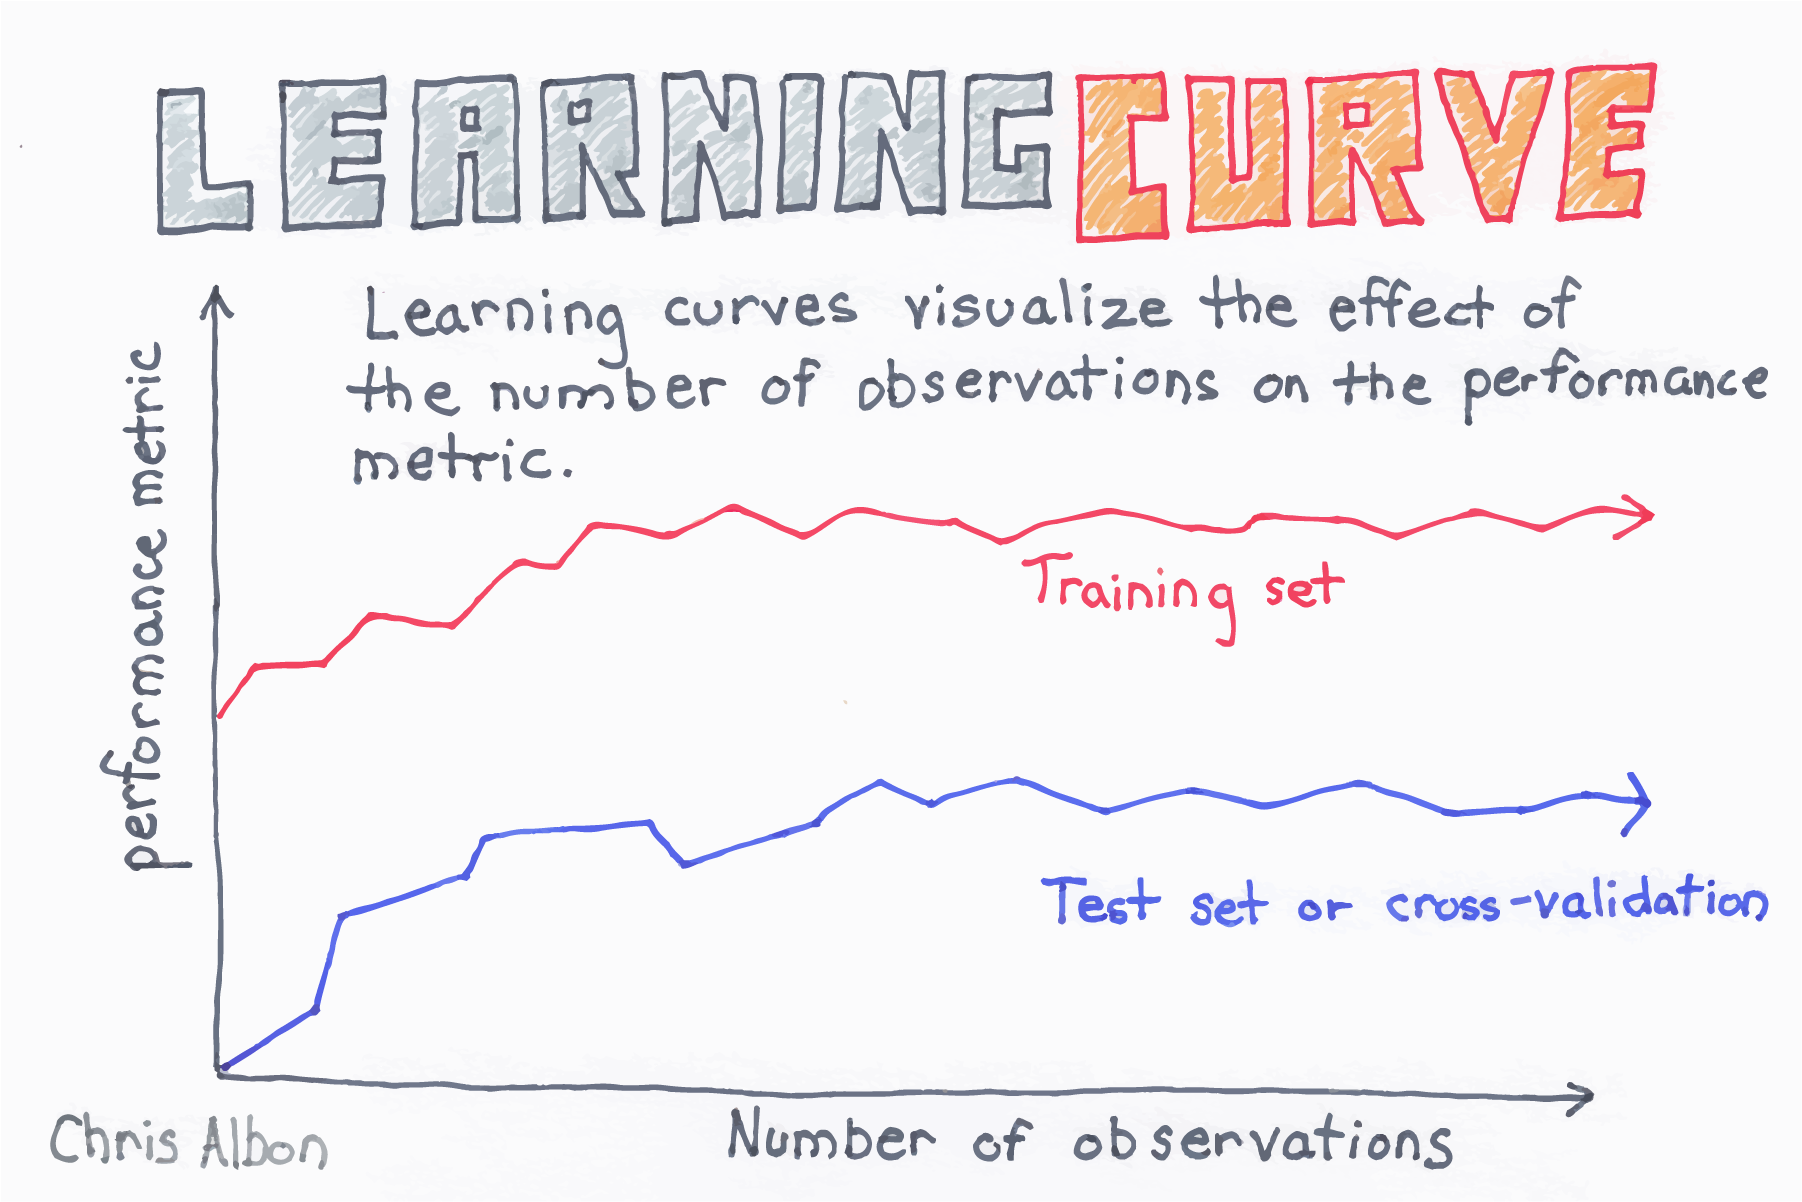

The metric used to evaluate learning could be maximizing, meaning that better scores (larger numbers) indicate more learning. An example would be classification accuracy.

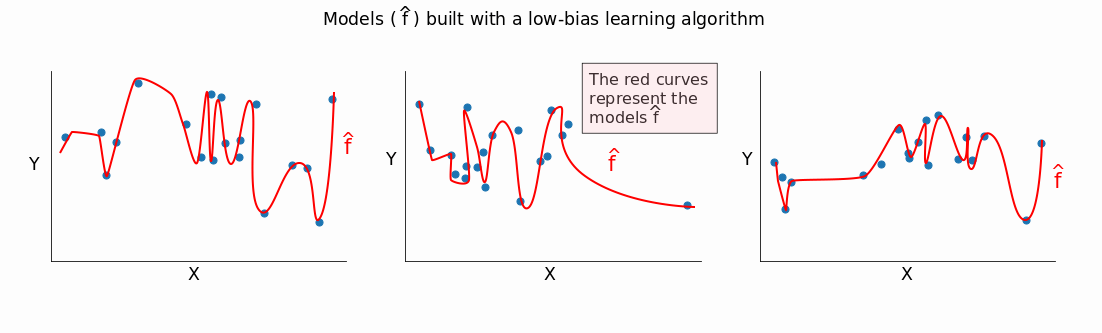

### bias-variance trade-off

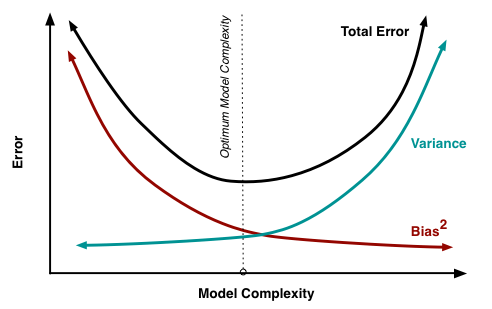

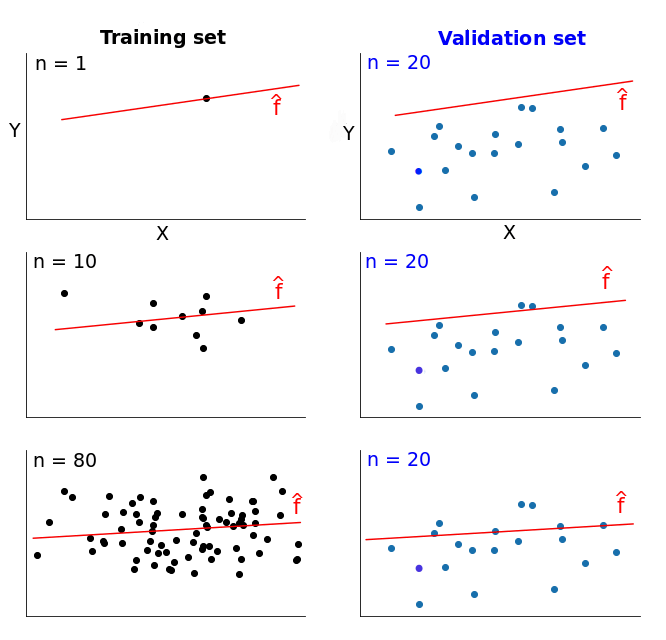

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve

In [2]:
cancer = load_breast_cancer()

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
X = cancer.data
y = cancer.target

In [5]:
X.shape

(569, 30)

In [6]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv = 10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)

[learning_curve] Training set sizes: [  5  15  25  36  46  56  67  77  87  98 108 118 129 139 149 159 170 180
 190 201 211 221 232 242 252 263 273 283 294 304 314 325 335 345 356 366
 376 387 397 407 418 428 438 449 459 469 480 490 500 511]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.2s finished


In [7]:
train_mean = np.mean(train_scores, axis = 1)
train_mean

array([1.        , 1.        , 0.992     , 0.99166667, 0.99565217,
       0.99464286, 0.99552239, 0.99480519, 0.99310345, 0.99387755,
       0.99351852, 0.99491525, 0.99457364, 0.99496403, 0.99731544,
       0.99685535, 0.99647059, 0.99722222, 0.99736842, 0.99751244,
       0.99668246, 0.99230769, 0.99612069, 0.99586777, 0.99880952,
       0.99657795, 0.9970696 , 0.99611307, 0.99659864, 0.99802632,
       0.99585987, 0.99507692, 0.99731343, 0.99652174, 0.99691011,
       0.99617486, 0.99867021, 0.99793282, 0.997733  , 0.997543  ,
       0.99665072, 0.99649533, 0.99817352, 0.99755011, 0.99738562,
       0.99808102, 0.99729167, 0.99571429, 0.9978    , 0.99726027])

In [8]:
train_std = np.std(train_scores, axis = 1)
train_std

array([0.        , 0.        , 0.016     , 0.01272938, 0.00869565,
       0.00818317, 0.00683967, 0.00636231, 0.00762442, 0.00676862,
       0.00424313, 0.0056214 , 0.00496366, 0.00723013, 0.00328791,
       0.004219  , 0.00539127, 0.00447903, 0.00353063, 0.00333741,
       0.00303466, 0.00353405, 0.00358044, 0.00413223, 0.00181848,
       0.00315841, 0.0014652 , 0.00431327, 0.00263468, 0.00301485,
       0.0032006 , 0.00246154, 0.00160751, 0.00338026, 0.00196629,
       0.00390242, 0.0017841 , 0.00225266, 0.00209235, 0.00219761,
       0.00287081, 0.00261223, 0.00170852, 0.00185003, 0.00234648,
       0.00149254, 0.00264345, 0.00308832, 0.0018868 , 0.00217916])

In [9]:
test_mean = np.mean(test_scores, axis = 1)
test_mean

array([0.3725726 , 0.3725726 , 0.68907614, 0.78281264, 0.62828299,
       0.80806002, 0.84155324, 0.87661503, 0.8750162 , 0.90502982,
       0.90872656, 0.91380283, 0.92627258, 0.90142598, 0.90659839,
       0.91029189, 0.93849494, 0.92082145, 0.93846254, 0.92433022,
       0.93858461, 0.92439396, 0.94033899, 0.93516874, 0.95259269,
       0.94394067, 0.94742136, 0.92984293, 0.94209554, 0.93501534,
       0.94052372, 0.94733061, 0.94563456, 0.9367384 , 0.94917574,
       0.94043406, 0.94218736, 0.95265643, 0.94557406, 0.95447023,
       0.94572855, 0.95979712, 0.95456313, 0.95450156, 0.94736086,
       0.95807406, 0.95810431, 0.95271584, 0.95434707, 0.95976471])

In [10]:
test_std = np.std(test_scores, axis = 1)
test_std

array([0.00441189, 0.00441189, 0.13834372, 0.14807107, 0.15101358,
       0.06008958, 0.06647212, 0.05038185, 0.03642716, 0.04494355,
       0.04011034, 0.04458494, 0.03206499, 0.05020209, 0.04923626,
       0.05492649, 0.02960309, 0.04767975, 0.03069693, 0.04603902,
       0.03722614, 0.03850092, 0.0374733 , 0.03254365, 0.03117686,
       0.04151922, 0.03186115, 0.04054218, 0.03103655, 0.02205621,
       0.04822543, 0.03206097, 0.03220284, 0.04166298, 0.03772378,
       0.03644492, 0.04014734, 0.03516381, 0.03864701, 0.03126539,
       0.03320657, 0.03477939, 0.03636272, 0.03025333, 0.02045596,
       0.03475827, 0.04254955, 0.02990277, 0.03300966, 0.03533986])

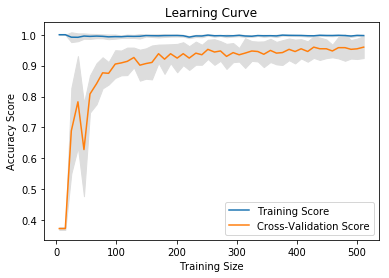

In [16]:
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color = '#DDDDDD')



plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')